<a href="https://colab.research.google.com/github/mahynski/chemometric-carpentry/blob/main/notebooks/5_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
❓ ***Objective***: This notebook will introduce some machine learning models.  

🔁 ***Remember***: You can always revisit this notebook for reference again in the future.  Ideas and best practices will be reinforced in future notebooks, so don't worry about remembering everything the first time you see something new.

🧑 Author: Nathan A. Mahynski

📆 Date: June 10, 2024

---

We have discussed the concept of a pipeline and its 2 main aspects: preprocessing and modeling.  Conventional chemometric models 🔬, while often older than many machine learning 💻 ones, are still very useful because they are designed to handle specific situations encountered in chemometric applications that are not as routine in other disciplines (like $N << p$).  However, one reason [PyChemAuth](https://pychemauth.readthedocs.io/en/latest/index.html) follows sklearn's [esimator API](https://scikit-learn.org/stable/developers/develop.html) is that the machine learning ecosystem is vast and has many powerful tools in it that we would like to leverage for chemometric studies.  Machine learning is now a mature, popular field with many introductory text books, tutorials, and other resources.  Here, we will only focus on the topics most relevant to chemometric modeling so the following summary is not remotely exhaustive.

Perhaps the most important thing to keep in mind is that our goal is not always to simply find the "best performing" model possible.  It is more nuanced than this.  In scientific applications, models should not only perform well (i.e., have $R^2 → 1$, or have high $TEFF$) but should also be interpretable.  

🤔 Imagine that you are presented with a model ⬛ that, when you ask it something about the physical world returns amazingly accurate predictions.  After asking a series of hard questions to develop some faith in the model, your next question would be: how is it doing that?!

For many other (non-scientific) applications, there is sometimes interest in this for reasons related to fairness, equity, and other factors, depending on the use.  However, models are all around us and many serve fairly benign tasks.  In those cases, explainability is not as important to the developer or end user - you just want it to "work".  We do not have that luxury 🍹 - in fact, more often than not, a simpler model that is easy to understand teaches us much more than a black box model that nominally performs "better".

This is focus on the next section, but it is important to keep this in mind now since this helps explain which models from the ML universe 🌌 are most relevant for chemometric applications.

In general, there are 2 possible goals:
1. Develop the most "accurate" predictive model since, when deployed, this will help improve people's lives 👍.
2. Develop a model, or a series of models, that help us learn about the data and what it means. This is more interactive philosophy that helps the data "talk" 🗨 to us.







sklearn has a nice ["cheat sheet"](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for point you to the right model based on your need and the amount of data you have.  It is helpful suggestion, but not always perfect.

![image](https://scikit-learn.org/stable/_downloads/b82bf6cd7438a351f19fac60fbc0d927/ml_map.svg)

# 📈 Regression Models



Regression models predict a number, or several numbers (multioutput), given some data.  We have reviewed several examples from the classic chemometric literature, including:

* [Ordinary Least Squares (OLS)](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/ols.html); [Interactive Tool](https://chemometric-carpentry-ols.streamlit.app/)
* [Principal Components Regression (PCR)](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/pca_pcr.html); [Interactive Tool](https://chemometric-carpentry-pcr.streamlit.app/)
* [Partial Least-Squares (PLS) or Projection to Latent Structures](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/pls.html);  [Interactive Tool](https://chemometric-carpentry-pls.streamlit.app/)

However, these models all contain assumptions and [inductive biases](https://en.wikipedia.org/wiki/Inductive_bias).  Next we will discuss 2 state-of-the-art models which are on different ends of the "interpretability" spectrum.

## Artificial Neural Networks

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/images/02_01.png?raw=true" align="right" height=250/>

Neural networks get their name from the cellular architecture that originally inspired them: a brain cell (neuron).  The idea is that cells are interconnected and "fire" only when a sufficiently large stimulus is provided.  This originates with [McCulloch and Pitts](https://link.springer.com/article/10.1007/BF02478259) in 1943 who interpreted this is a simple logic gate with a binary (on/off) output (image credit to [Rashka & Mirjalili](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master)).

This is a nice introduction to and summary of "fully connected" neural networks from 3Blue1Brown on YouTube.


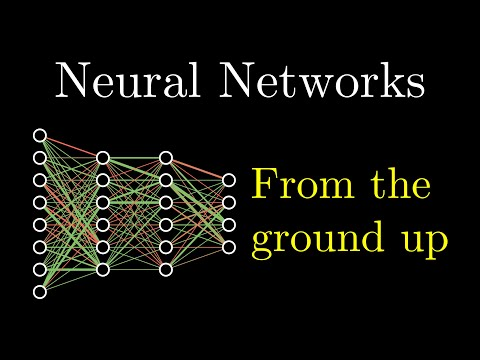

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('aircAruvnKk', width=800, height=500)

<img src="https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png" align="right" height=600/>

The basic idea is to connect many such neurons to each other in different ways to create a complex network that can model (either classify or regress) data.  Here is a summary of the "neural network zoo" from the [Asimov Institute](https://www.asimovinstitute.org/neural-network-zoo/).  You can read more about each of these different architectures elsewhere, but the point is that connecting different sorts of nodes in different ways turns out to be a very powerful way to model data.  

In fact, it has been shown that neural networks can fit ANY function arbitrarily well.  This is due to set of theorems called the [Universal Approximation Theorems (UATs)](https://en.wikipedia.org/wiki/Universal_approximation_theorem).  DeepMind has a nice discussion and illustration [here](https://www.deep-mind.org/2023/03/26/the-universal-approximation-theorem/).  The important takeaway is that for almost any function that exists, there is a neural network that will approximate it arbitrarily well.  Finding that network is hard, though, which is the subject of much research, [best practice development](https://course.fast.ai/), and the [importance of GPUs](https://towardsdatascience.com/what-is-a-gpu-and-do-you-need-one-in-deep-learning-718b9597aa0d) in this field.

---
> ❗ Still, this is the basic reason that ANNs are so successful today.
---

[Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) extended McCulloch & Pitts' neuron model (which was not trainable in its original form) to include a ["perceptron learning rule"](https://babel.hathitrust.org/cgi/pt?id=mdp.39015039846566&view=1up&seq=2); this extended the neuron model by including a series of "weights" (learnable floating point numbers) that

<img src="https://www.deep-mind.org/wp-content/ql-cache/quicklatex.com-8f3f3f0af73f36169790d5b5ac89d884_l3.svg" align="left">

1. multiply each input, then
2. are summed and
3. passed through an activation function.

This is sketched at the left (image credit to [deep mind](https://www.deep-mind.org/2023/03/26/the-universal-approximation-theorem/)), though the activation function is not explicitly shown (nor is it usually, [unfortunately](https://towardsdatascience.com/please-stop-drawing-neural-networks-wrong-ffd02b67ad77)).

The activation function MUST be a non-linear function, such as a step function, which determines whether or not the neuron "fires".  It is very important that this is non-linear, since otherwise we could reduce the operation to a simple vector (linear) operation.  For example, the operation depicted at the left appears to be simply $\vec{x} \cdot \vec{w}$ where $\vec{x}$ is the vector of inputs (a row in $X$ for example) and $\vec{w}$ is the vector of weights.

---
> ❗ The activation function is the secret to creating incredibly complex and powerful networks.
---



In [12]:
import numpy as np

# Basically a row in your matrix, X
input = np.array(
    [
        [1, 2, 3, 4],
        [1, 2, 3, 40]
    ]
)

# Learnable weights that multiply the input
weights = np.array([0.1, 0.5, 2.0, -0.3])

# There is usually a constant "bias" unit added also (like an intercept term in OLS)
bias_unit = -0.5

# The stimulus the neuron receives
stimulus_0 = np.dot(input[0], weights) + bias_unit
stimulus_1 = np.dot(input[1], weights) + bias_unit

# This returns a 0 or 1 (useful for binary classification, for example)
activation_function = lambda x: 1 if x > 0 else 0

print(stimulus_0, activation_function(stimulus_0))
print(stimulus_1, activation_function(stimulus_1))

5.3999999999999995 1
-5.4 0


<img src="https://www.deep-mind.org/wp-content/ql-cache/quicklatex.com-bd34b47a314100c4bada3b9412cc5dd2_l3.svg" align="left">

The idea of [Multilayer perceptrons](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron) is to include intermediate ("hidden") layers between the input and output. The image at the left (credit to [deep mind]()) shows the input vector in green (one circle for each value in the vector), 3 hidden layers in blue, and the output layer in red (here, 3 numbers are being predicted).  

Each node has its own weights associated with it which can be learned.  If each node in a layer is connected to each node in the next (acts as input to that node), this is referred to as a "fully connected feed-forward neural network."  This is the type of ANN most commonly employed in chemometric applications; thanks to the UATs we can use this sort of network to predict basically anything we want!

There are highly optimized libraries for building and training neural networks such as:

* [Keras](https://keras.io/)
* [PyTorch](https://pytorch.org/)

However, [sklearn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-network-models-supervised) has its own implementation which is typically fine for small networks with a relatively small amount of data.  For chemometric applications, this is often perfectly adequate.

Neural networks, in general, are enormously powerful but have a few significant challenges associated with training them well:

1. Hidden layers generally create a "non-convex" loss function; this means there are multiple local minima each of which represent a different set of learned weights. It can be hard to find the global minima (overall best) and different random weight initializations can lead to different results.

2. They requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations to run the weight optimization ("epochs").

3. They are sensitive to feature scaling.

In [13]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

## Explainable Boosting Machine

# ✅ Classification Models

## Decision Trees

<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg" height=400 align="right"/>
[Decision trees](https://scikit-learn.org/stable/modules/tree.html#decision-trees) 🌳 are models which break down a decision into a series of "if then" statements. Historically, have been [different ways](https://en.wikipedia.org/wiki/Decision_tree_learning#Decision_tree_types) developed to create these trees, however, the ["classification and regression tree" (CART)](https://doi.org/10.1201/9781315139470) methodology is [implemented in sklearn](https://www.geeksforgeeks.org/cart-classification-and-regression-tree-in-machine-learning/) and is very popular.  Sklearn summarizes some of the differences [here](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).

CART proceeds like this:

* Starting from the top of the tree, each node contains a criteria ("is column 3 in X greater than 1.234?"); if true, you move away from the node in one direction, if false, you move in another.  

* At each node, the goal is to take the input and split it into the most "pure" chunks possible.  To do this, some function like [entropy or gini impurity](https://scikit-learn.org/stable/modules/tree.html#classification-criteria) is optimized resulting in a value, $v$, for a given feature, $f$, so that when you divide the input based on "is $f$ < $v$?" you produce the best split possible.  This is repeated for all or a subset of features to find the best feature and its split value.  

* This process is then repreated on the new chunks until some stopping criteria is met and the tree has been fully "grown".  The terminal nodes ("leaf" nodes) are assigned the majority class of what is in that node from the training set.

At the right is an example of decision tree from Wikipedia predicting the chances of survival on the Titanic. The number of nodes (depth) is the main hyperparameter in a tree.

👉 Here is sklearn's guidance on [getting the most out of decision trees](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).

👀 Decision trees are considered the "gold standard" of interpretable models since they are so easy to understand.


---
> ❗ Read the documentation on sklearn's DecisionTreeClassifier
---

In [1]:
from sklearn.tree import DecisionTreeClassifier
?DecisionTreeClassifier

Let's train a simple tree on some familiar data: the iris dataset 💐.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris(return_X_y=False, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, shuffle=True, random_state=42,
    stratify=data.target
)

In [58]:
# A depth 1 decision tree is sometimes called a "stump"
stump = DecisionTreeClassifier(
    random_state=0, # Be sure to set this for reproducibility
    max_depth=1,
    class_weight='balanced' # Balance the tree based on class probabilities
)
_ = stump.fit(X_train, y_train)

tree = DecisionTreeClassifier(
    random_state=0, # Be sure to set this for reproducibility
    max_depth=3,
    class_weight='balanced' # Balance the tree based on class probabilities
)
_ = tree.fit(X_train, y_train)

### Visualizing Decision Trees

sklearn has a built-in tool to visualize 👀 your decision tree once it is trained.

---
> ❗ Read the documention of `plot_tree` from sklearn.
---

In [47]:
from sklearn.tree import plot_tree
?plot_tree

Here is some [code from sklearn](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) which helps us understand the internal workings of a decision tree.

In [133]:
import numpy as np

def describe_tree(clf):
    """
    Some code to explain the decision tree.
    """
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node.".format(
                    space=node_depth[i] * "\t", node=i
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

def prediction_path(X, clf, sample_id = 0):
    """
    Follow a series of points, X_test, through the decision tree.
    """
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_indicator = clf.decision_path(X)
    leaf_id = clf.apply(X)


    # obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
    node_index = node_indicator.indices[
        node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
    ]

    print("Rules used to predict sample {id}:\n".format(id=sample_id))
    for node_id in node_index:
        # continue to the next node if it is a leaf node
        if leaf_id[sample_id] == node_id:
            continue

        # check if value of the split feature for sample 0 is below threshold
        if X.iloc[sample_id, feature[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print(
            "decision node {node} : (X[{sample}, {feature}] = {value}) "
            "{inequality} {threshold})".format(
                node=node_id,
                sample=sample_id,
                feature=feature[node_id],
                value=X.iloc[sample_id, feature[node_id]],
                inequality=threshold_sign,
                threshold=threshold[node_id],
            )
        )

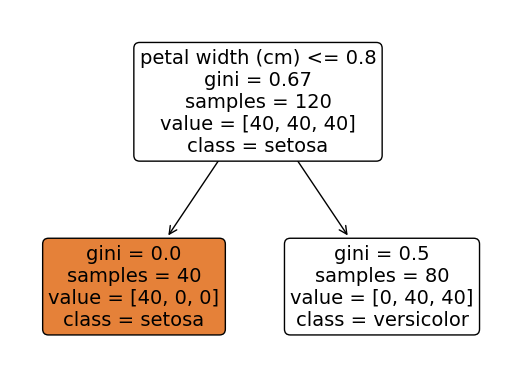

In [113]:
_ = plot_tree(
    stump,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    label='all',
    impurity=True,
    proportion=False,
    precision=2,
    rounded=True, # Improved visualization
    filled=True # Color-code the tree based on majority class
)

In [114]:
describe_tree(stump)

The binary tree structure has 3 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a leaf node.


In [148]:
sample_id = 1
print(X_train.iloc[sample_id])

prediction_path(
    X_train,
    stump,
    sample_id=sample_id # Row from X_train to analyze
)

sepal length (cm)    4.9
sepal width (cm)     2.5
petal length (cm)    4.5
petal width (cm)     1.7
Name: 106, dtype: float64
Rules used to predict sample 1:

decision node 0 : (X[1, 3] = 1.7) > 0.800000011920929)


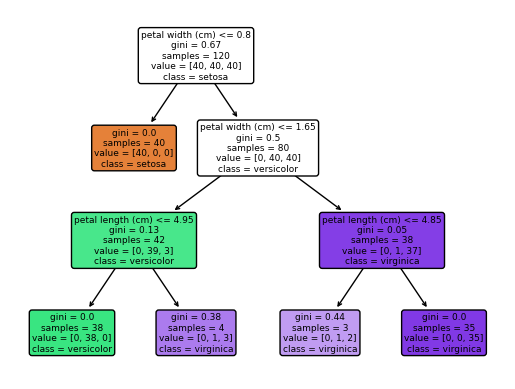

In [116]:
_ = plot_tree(
    tree,
    feature_names=data['feature_names'],
    class_names=data['target_names'],
    label='all',
    impurity=True,
    proportion=False,
    precision=2,
    rounded=True, # Improved visualization
    filled=True # Color-code the tree based on majority class
)

In [100]:
describe_tree(tree)

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 3] <= 1.6500000357627869 else to node 6.
		node=3 is a split node: go to node 4 if X[:, 2] <= 4.950000047683716 else to node 5.
			node=4 is a leaf node.
			node=5 is a leaf node.
		node=6 is a split node: go to node 7 if X[:, 2] <= 4.8500001430511475 else to node 8.
			node=7 is a leaf node.
			node=8 is a leaf node.


In [146]:
sample_id = 1
print(X_train.iloc[sample_id])

prediction_path(
    X_train,
    tree,
    sample_id=sample_id # Row from X_train to analyze
)

sepal length (cm)    4.9
sepal width (cm)     2.5
petal length (cm)    4.5
petal width (cm)     1.7
Name: 106, dtype: float64
Rules used to predict sample 1:

decision node 0 : (X[1, 3] = 1.7) > 0.800000011920929)
decision node 2 : (X[1, 3] = 1.7) > 1.6500000357627869)
decision node 6 : (X[1, 2] = 4.5) <= 4.8500001430511475)


### Visualizing Decision Boundaries

You can visualize the decision boundaries and pathways using sklearn; there are also 3rd party tools which can be nice for an even more enhanced experience.  For example, try [dtreeviz](https://github.com/parrt/dtreeviz).

---
> ❗ Read the documention of `DecisionBoundaryDisplay.from_estimator` from sklearn.
---

Also see [here](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py) for more details.

In [63]:
from sklearn.inspection import DecisionBoundaryDisplay
?DecisionBoundaryDisplay.from_estimator

In [76]:
# The visualizer expects there to be only 2 features, so let's retrain a tree
# using on the 2 we care about.
X_ = X_train[['petal length (cm)', 'petal width (cm)']]

tree_viz = DecisionTreeClassifier(
    random_state=0, # Be sure to set this for reproducibility
    max_depth=3,
    class_weight='balanced' # Balance the tree based on class probabilities
).fit(X_, y_train)

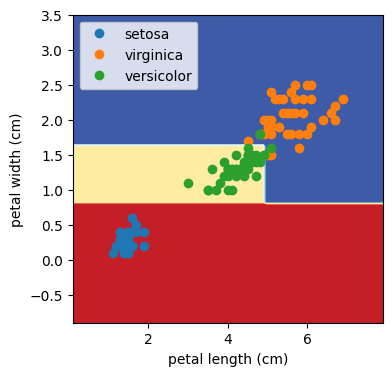

In [85]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

for class_ in y_train.unique():
    mask = y_train.values == class_
    ax.plot(X_.iloc[mask,0], X_.iloc[mask,1], 'o', label=data['target_names'][class_])

_ = DecisionBoundaryDisplay.from_estimator(
    tree_viz,
    X_train[['petal length (cm)', 'petal width (cm)']],
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel='petal length (cm)',
    ylabel='petal width (cm)',
    ax=ax
)

_ = ax.legend(loc='best')

### Pros and Cons

The [primary advantages](https://scikit-learn.org/stable/modules/tree.html#decision-trees) of decision trees are that they are:

1. 🚆 Easy to train,
2. 🤔 Easy to understand,
3. 📏 Require no data standardization!

To understand the last point, remember, a tree is just finding a delimiting value that splits apart a set of points.  It does not make any assumptions about the shape or distribution of the data.

The primary disadvantages include:

1. ⚖ Can be biased if dataset is imbalanced,
2. ➰ Can easily overfit!

The first issue is straightforward to deal with by using a tool like SMOTE; or we can simply specify `class_weight=balanced` when we instantiate the tree to adjust the weights of each point inverse proportional to the class frequencies.

The second issue can be handled by carefully controlling the depth of the tree (deep trees are more likely to overfit).  Or, we can use another approach: model ensembling.

## Ensemble Methods

<img src="https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Second-Edition/master/Chapter07/images/07_02.png" height=350 align="right" />

Ensemble methods are meta estimators which combine multiple models to improve generalization accuracy.  The success of this approach comes from having a diverse set of models so that their individual errors are compensated for by other models (see math below).  The different constituents vote and the final prediction is due to this combination.  A common method is to just use the majority (or plurality) vote.  In the figure at the right (from [Raschka & Mirjalili's Python Machine Learning, 2nd Ed.](https://www.packtpub.com/product/python-machine-learning-second-edition-second-edition/9781787125933)) the predictions, $P_i$ for model $i$, can also be weighted by, for example, their certainty; simple majority voting corresponds to identical weights for all participating models.

sklearn has a [detailed discussion](https://scikit-learn.org/stable/modules/ensemble.html#ensembles-gradient-boosting-random-forests-bagging-voting-stacking) on the ensemble methods they have implemented including their capabilities, shortcomings, and applications.  It is worth the time to read this if you are interested.

Ensemble methods are intuitive and quite clever; to see why consider a binary classification task where all base learners have some error rate, $\epsilon$.  If these are independent of each other, then we can express the probability that out of an ensemble of $n$ classifiers, $k$ will be incorrect as a [binomial probability mass function](https://en.wikipedia.org/wiki/Binomial_distribution):

$$
P(k) = {n \choose k} \epsilon^k (1-\epsilon)^{n-k}
$$

If we are taking the majority vote then our ensemble will only predict the wrong answer if the majority of its members are wrong.  This is true when $k \ge n/2$, or

$$
P(k \ge n/2) = \sum_{k=n/2}^n {n \choose k} \epsilon^k (1-\epsilon)^{n-k} = \epsilon_{\rm ensemble}
$$




In [149]:
from scipy.special import comb
import numpy as np
def ensemble_error(n, eps):
    """Based on Raschka & Mirjalili."""
    k0 = int(np.ceil(n / 2.0))
    p = [comb(n, k)*(eps**k)*(1.0-eps)**(n-k) for k in range(k0, n+1)]
    return sum(p)

In [150]:
ensemble_error(11, 0.25)

0.03432750701904297

If we are using an ensemble of 11 classifiers and each is quite poor ($\epsilon = 0.25$, so 75% accuracy), then the chance that at least 6 of them are incorrect is $P \sim 0.034$; since at least 6 of them need to be wrong for a majority vote to produce the wrong prediction, we have now boosted the model from 75% to 96.6% accuracy!

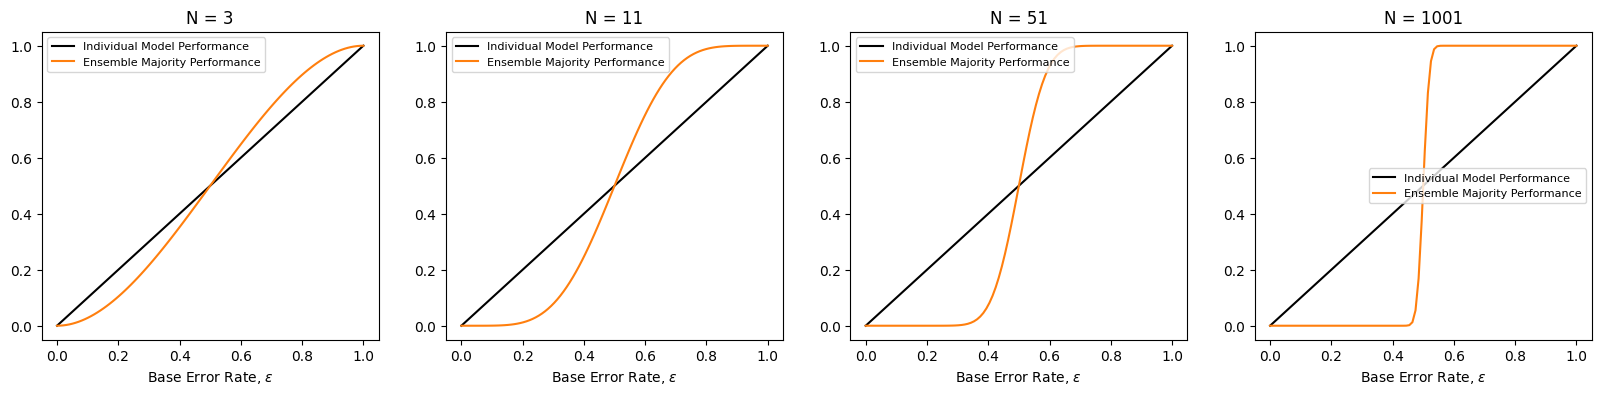

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
for ax, n in zip(axes.ravel(), [3, 11, 51, 1001]):
    eps = np.linspace(0, 1.0, 100)
    ax.plot(eps, eps, 'k', label='Individual Model Performance')
    ax.plot(eps, [ensemble_error(n=n, eps=e) for e in eps], color='C1', label='Ensemble Majority Performance')
    ax.legend(loc='best', fontsize=8)
    ax.set_xlabel('Base Error Rate, '+'$\epsilon$')
    ax.set_title(f'N = {n}')

🤯 Let this sink in - when we have about 50 DIFFERENT models which are only slightly better than flipping a coin, we can drive the ensemble (average) prediction almost to 0!

The key 🔑 is that these models need to "think differently" - that is, we have assumed the errors are uncorrelated (independent) which means each model is reaching its conclusion for a (completely) different reason.  Of course, in reality we never completely achieve this and our true ensemble behavior falls between the two curves above (the black line represents an ensemble of $N$ identical, or completely correlated, models).

👉 The sum 🚗 is greater (better) than its parts ⚙!

You can achieve this in practice several ways including:

1. Using many different models in your ensemble (decision tree, SVC, PLS model, ...)

2. Train models using different data.

In practice, using model inspection tools 🔍 to verify that models behave sufficiently differently can be one way to accomplish the first route.  But it turns out the second way leads to one of the most remarkable models ever created in the field of machine learning!



---

❓ Q: What happens when $\epsilon > 0.5$?

---


### Bagging

<a href="https://en.wikipedia.org/wiki/Bootstrap_aggregating"><img align="right" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/1920px-Ensemble_Bagging.svg.png" width=500px></a>

["Bagging"](https://en.wikipedia.org/wiki/Bootstrap_aggregating) is an acronym for [(B)oostrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) (Agg)regat(ing) 👜; the idea is to average many simple models each trained on randomly drawn subsamples of the data (with replacement, hence bootstrap sample).  This averaging, or aggregating, reduces the variance and model overfitting tendencies.  Bagging is a "parallel" operation is the sense that each model in the ensemble is indendent and can therefore be trained separately.  [Bagging works best when you employ strong, complex models](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator) that essentially overfit a boostrapped sample; when averaged over many different bootstraps, the error rate averages to zero (if fully independent).  When averaged, these models tend not to overfit and are fairly insensitive to specific hyperparameter choices - the same is not true for boosting.

<!-- Bagging is when we draw bootstrap samples; if subsets are drawn randomly, this is called "pasting" instead.  You can also draw random features ("random subspaces"), or combine this with pasting to get "random patches" - see the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator) for references and details. -->

❗ Bagging is very good at reducing model variance, but poor at reducing bias; this is why you need to use complex models with high variance and low bias as base estimators (deep decision trees, for example).

Randomly drawing from the data results in unique elements 63.2% of the time, while the other 37.8% of the data will end up being repeats (if you randomly resample N observations to create a bootstrap resample also of N observations).

See [L. Breiman, "Bagging predictors", Machine Learning, 24(2), 123-140, 1996](https://link.springer.com/article/10.1007/BF00058655) for the original work.

### Boosting

Boosting 🚀 takes a series of weak learners (slightly better than random) and trains them in series to produce a strong model 💪.  This is a "series" operation unlike the "parallel" operation that Bagging relies upon.  [Boosting works best with many weak models](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator), like shallow decision trees; this is in contrast to Bagging which relies on complex models (deep trees) to overfit the data in "different ways" when shown different subsets of the data.

Unlike bagging 👜, boosting 🚀 uses samples drawn without replacement.  The [original boosting algorithm](https://link.springer.com/article/10.1007/bf00116037) developed by Robert E. Schapire et al. in 1990 looks like this:

1. Draw random subset of data and train a learner, $C_1$.
2. Draw a second random subset of the data and add 50% of the samples from step (1) that were misclassified by $C_1$; train a new classifier, $C_2$.
3. Find the samples in the original training set with $C_1$ and $C_2$ disagree on, and train a third classifier, $C_3$, using that data.
4. Combine all classifiers into a majority vote.

❗ While it is possible for boosting to reduce bias and variance (not just variance) relative to bagging models, they are known for having high variance themselves and can overfit ➰ the data so proper tuning is important.

Schapire et al. received the [Goedel Prize in 2003](https://en.wikipedia.org/wiki/G%C3%B6del_Prize) (kind of like a Nobel Prize in computer science) for this groundbreaking work!



#### AdaBoost

One of the most popular boosting algorithms is AdaBoost (adaptive boosting) subsequently developed by [Freund and Schapire](https://link.springer.com/content/pdf/10.1007/BF00116037.pdf).  The idea is to essentially weight incorrectly predicted points more in each iteration, so the model learns from the mistakes previously made in the ensemble. From [sklearn's documentation](https://scikit-learn.org/stable/modules/ensemble.html#adaboost):

> "The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, \dots, w_N$, to each of the training samples. Initially, those weights are all set to $W_i = 1/N$, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence."

Graphically, the algorithms can be summarized in the figure at the right from [Raschka & Mirjalili's Python Machine Learning, 2nd Ed.](https://www.packtpub.com/product/python-machine-learning-second-edition-second-edition/9781787125933).
<a href="https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Second-Edition/master/Chapter07/images/07_09.png"><img align="right" src="https://user-images.githubusercontent.com/23516749/275580443-04f466f2-0dd6-4715-ba2a-c749d138f5d8.png" width=400px></a>

The basic algorithm looks like this in pseudocode:
1. Initialize normalized weights, $\sum w_i = 1$.
2. For each boosting round, $j$:
 * Train, $C_j = f(X, y, w)$.
 * Predict, $\hat{y} = C_j(X)$.
 * Compute the error rate, $\epsilon = w \dot (y \neq \hat{y})$. (0 for correct classification, 1 for incorrect in classification tasks)
 * Compute the coefficient, $\alpha_j = 0.5 {\rm log} \left( \frac{1-\epsilon}{\epsilon} \right)$.
 * Update weights, $w = w \times {\rm exp} \left( - \alpha_j \times \hat{y} \times y \right)$. (assuming $y$ is binary vector of +1 or -1 for each class so that correct classifcation results in a positive number and a negative otherwise)
 * Re-normalize the weights.
3. Final prediction is a $\alpha$-weighted average of the $j$ different classifiers, $C_j$, for each point; $\hat{y} = \sum_j \alpha_j C_j(X)$.

There exist discrete and real-valued AdaBoosting methods - see sklearn's [AdaBoost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) and [AdaBoost regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor) documentation here for more discussion.  There is an explicit [example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py) as well.

#### Gradient Boosting

Again, the idea is to train an ensemble of weak learners in series to create a strong learner.  Following [Wikipedia's example](https://en.wikipedia.org/wiki/Gradient_boosting), the easiest way to illustrate the idea is to follow that of ordinary least squares regression.  In OLS, you are trying to minimize the mean squred error loss function:

$$
L =\frac{1}{N} \sum \left( y_i - F(x_i) \right)^2
$$

Here, $F(x)$ is the model.  In gradient boosting the idea is that we have an imperfect model at each stage, $m < M$, out of $M$ total.  The error is then $h_m(x) = y - F_m(x)$; the idea is that at each stage a new estimator is added so that $F_{m+1}(x) = F_{m}(x) + h_m(x) = y$.  Gradient boosting fits $h_m(x)$ to the residual $y - F_m(x)$; other variants, like AdaBoost, just focus on correcting errors of the predecessor model.  Note that

$$
L \sim \left( y - F_m(x) \right)^2
$$

so that

$$
h_m(x) = - \frac{\partial L}{\partial F} \sim y - F_m(x)
$$

This interpretation that the residual is actually the gradient of the loss function with respect to the model.  Thus, a model is usually assumed which has some adjustable parameters (weighted sum of functions for example) that lets you take the derivative with respect to the function, $F$, and gradient descent can be employed.  This can be done using trees as the base models, which is what sklearn implements as [gradient boosted trees](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting). Gradient Tree Boosting is a generalization of boosting to arbitrary differentiable loss functions, and can be applied to both regression and classification tasks.

Some specialized, fast implementations exist elsewhere:

* [LightGBM](https://github.com/Microsoft/LightGBM)
* [XGBoost](https://xgboost.readthedocs.io/en/latest/)


## Random Forests

solve dtree issues by using bagging

so allthe advatnages of trees, also oob means you dont have to have separate test set, and easy to aprallelize over many processors.  also, empirically seen almost to nevery overfit with enough member trees so veru insensitive to hyperparemters

only downside is that you lose interpretability, but there are other ways to recover this.

really a magic bullet and these are still state of the art on tabular data!

## Logistic Regression (actually classification!)

# Authentication Models

## Out-of-Distribution / Novelty Detection

## Open Set Recognition

# AutoML

## What is it?

["AutoML"](https://www.automl.org/automl/) refers to ["automated machine learning"](https://en.wikipedia.org/wiki/Automated_machine_learning#:~:text=Automated%20machine%20learning%20(AutoML)%20is,learning%20to%20real%2Dworld%20problems.); that is, the automatic pipeline construction (including data preprocessing) and optimization.

The idea is that you can phrase the entire modeling pipeline construction and hyperparameter tuning process as a single optimization problem.  Then, given a finite set of computational resources, try to find the "best" pipeline in the amount of time or limited resources you allocate. Here is a visual description of [auto-sklearn](https://github.com/automl/auto-sklearn/).

<img src="https://github.com/automl/auto-sklearn/raw/development/doc/images/askl_pipeline.png" height=150 />

Lot's of powerful mathematics and optimization tools are used to automate most of the steps we have covered in this course so far.  The idea is that this will make ML more accessible to non-experts, reduce human errors, and enable research in applied settings.  While this is, itself, an exciting area of research, and has many applications in industrial settings, there is less utility in scientific applications.



## Caveats


<img src="https://filmschoolrejects.com/wp-content/uploads/2019/08/itsatrap-2.jpg" align="right" height=350 />

Recall the original taxonomy at the top of this notebook.  In scientific settings, the "best performing" model is not always the most useful or educational.  The process of building these models and evaluating them is a form of EDA which can be critical to the physical scientist.  Recall, the idea of Rashomon sets where we may have many nearly equally high performing models, but some are much simpler and (perhaps) informative.

> Note the same [Leo Breiman](https://en.wikipedia.org/wiki/Leo_Breiman) coined the term Rashomon set / effect and created Random Forests.

In particular, it is often difficult to tell if the performance differences between models are statistically significant or not.  For data-intensive ML applications, model training and evaluation can get very expensive 💰 so less emphasis (to date) has been placed on determining this.  However, in the chemometric (generally low data limit) space we can often afford to evaluate this, and this will be the subject of a later section in this course.

This is not black-and-white, and there are certainly use cases for AutoML in science and engineering, but you should not flatly substitute AutoML for the task of modeling chemometric data (yet, anyway).

Model complexity also impacts the feasibility of real-world application.
An often cited example is the [$1 Million Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize), which was won in 2009 using ensemble methods (not done with AutoML, but still a very internally complex model). The details of the solution are published [here](https://www.asc.ohio-state.edu/statistics/dmsl/GrandPrize2009_BPC_BigChaos.pdf).

The winning team was awarded the money, however, Netflix never implemented the model:

> ["We evaluted some fo the new methods offline but the additional accuracy gains that we measured did not seem to justify the engineering effort needed to bring them into a production environment."](https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429)